### Simple PyTorch Regression: MPG
This example shows how to encode the MPG dataset for regression and predict values. We will see if we can predict the miles per gallon (MPG) for a car based on the car's weight, cylinders, engine size, and other features.

In [6]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from IPython.display import Image

In [7]:
# select calculation device
has_cuda = torch.cuda.is_available()
device = "cuda" if has_cuda else "cpu"
print(f'Using device: {device}')

Using device: cuda


In [8]:
# read the MPG dataset
df = pd.read_csv('data/auto-mpg.csv', na_values=["NA","?"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [9]:
cars = df["name"]

#handle missing values (with median?)
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

# convert the input features from pandas to numpy
x = df[
    [
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin"
    ]
].values

# convert the expected results from pandas to numpy
y = df["mpg"].values

# numpy to pytorch
x = torch.tensor(x, device=device, dtype=torch.float32)
y = torch.tensor(y, device=device, dtype=torch.float32)
print(x.shape[1])

7


The names of the cars are saved since these names aren't relevant to the training. For the neural network are selected the df fields that could be in relation to the MPG output with the appropriate number of input neurons = number of features.

You define your neural network in the Sequence above. In this case, we have a neural network with an input layer equal to the number of inputs you specify from the MPG dataset. The neural network connects these inputs to 50 neurons in the first hidden layer, which are connected to 25 neurons in the second layer. The output neuron count for a layer must always match the input count of the next layer.

In this case there will be used the ReLu activation function  for hidden layers. For a regression task we will not use an activation function for the output of the output layer. For classification, we use the logistic for binary classification (just two classes) or log softmax for two or more classes.

For the neural network to perform correctly, everything must align. The `sequence` must specify all layers with the same number of outputs as inputs for each connection.

We are ready to create the neural network, loss function, and optimizer class with the data loaded.

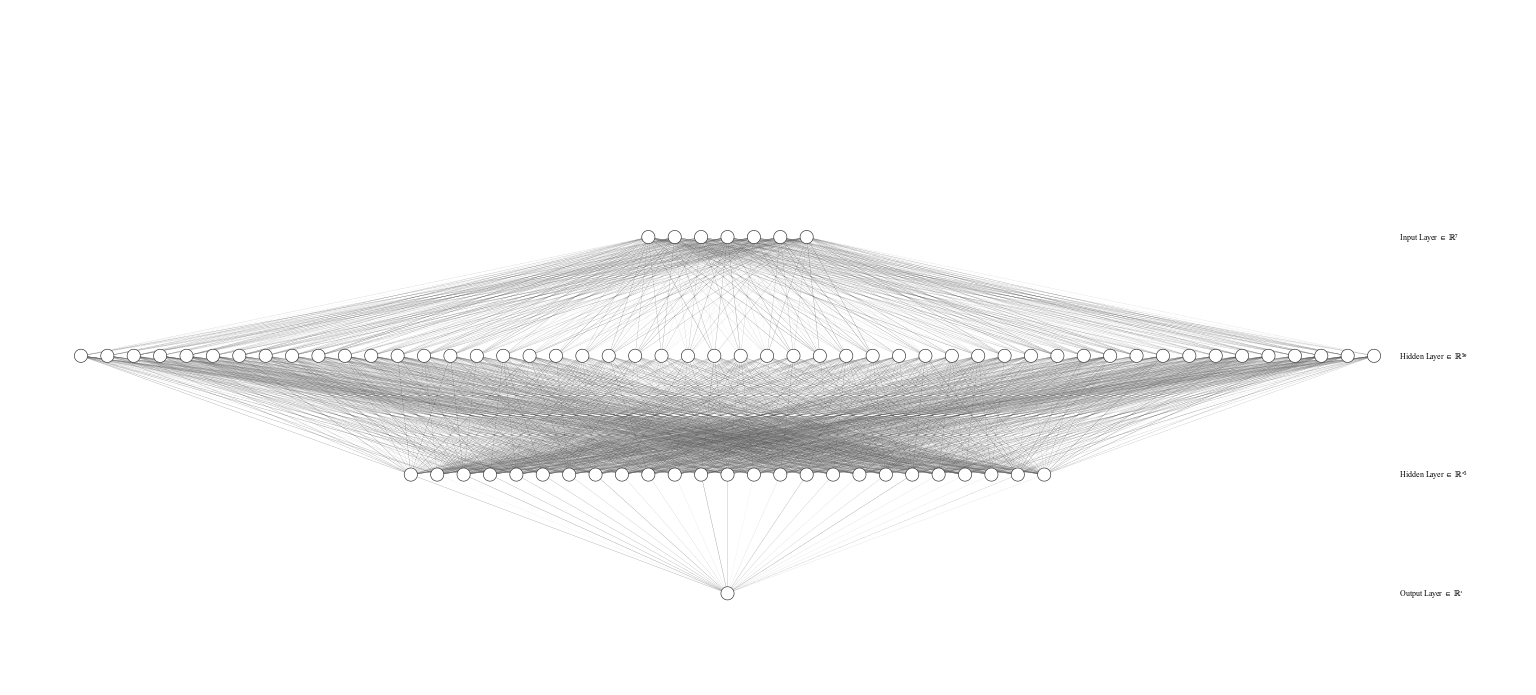

In [10]:
# neural network architecture representation
Image("images/MPG_regression.png")

In [13]:
# in sequence Neural network definition using the Secuential Method
model = nn.Sequential(
    nn.Linear(x.shape[1], 50),
    nn.ReLU(),
    nn.Linear(50, 25),
    nn.ReLU(),
    nn.Linear(25, 1),
)

# set the model to the device
model.to(device)

# define the Mean Squared Error loss function for regression
loss_fn = nn.MSELoss()

# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01) <- with this optimizer the network works

We create the neural network with one input equal to the number of columns in the x-input data. We specify one output neuron which will predict the MPG. Next, we define MSELoss as the error function, which is a common choice for regression. We will use the Adam optimizer with a learning rate of 0.01 to train the network. Adam is a common choice, and 0.01 is a good start for a learning rate. The learning rate should never be above 1.0. Too large of a learning rate will fail to learn the problem thoroughly, and too low of a learning rate will take a long time to train. We will see more advanced methods for choosing the learning rate, including schedules that change it throughout training.

The training algorithm could be

In [14]:
# train for 500 epochs
for epoch in range(500):
    optimizer.zero_grad()
    y_pred = model(x).flatten()
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
    # display status every 50 epochs
    if epoch % 50 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

Epoch: 0, Loss: 12322.5459
Epoch: 50, Loss: nan
Epoch: 100, Loss: nan
Epoch: 150, Loss: nan
Epoch: 200, Loss: nan
Epoch: 250, Loss: nan
Epoch: 300, Loss: nan
Epoch: 350, Loss: nan
Epoch: 400, Loss: nan
Epoch: 450, Loss: nan
